In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
#STEP1: FIND AND DOWNLOAD DATA SET 

In [4]:
wine = pd.read_csv('Datasets/wine.csv')

In [5]:
wine.head()

,class,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
wine["class"] = wine["class"].astype("object")

In [7]:
print(wine.dtypes)

class                         object
alcohol                      float64
malic_acid                   float64
ash                          float64
alcalinity_ash               float64
magnesium                      int64
total_phenols                float64
flavanoids                   float64
nonflavanoid_phenols         float64
proanthocyanins              float64
color_intensity              float64
hue                          float64
OD280_OD315_diluted_wines    float64
proline                        int64
dtype: object


In [8]:
y = wine[['class']]
print(y)

    class
0       1
1       1
2       1
3       1
4       1
..    ...
173     3
174     3
175     3
176     3
177     3

[178 rows x 1 columns]


In [9]:
X = wine.drop(['class'], axis=1)
print(X)

     alcohol  malic_acid   ash  alcalinity_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43            15.6        127           2.80   
1      13.20        1.78  2.14            11.2        100           2.65   
2      13.16        2.36  2.67            18.6        101           2.80   
3      14.37        1.95  2.50            16.8        113           3.85   
4      13.24        2.59  2.87            21.0        118           2.80   
..       ...         ...   ...             ...        ...            ...   
173    13.71        5.65  2.45            20.5         95           1.68   
174    13.40        3.91  2.48            23.0        102           1.80   
175    13.27        4.28  2.26            20.0        120           1.59   
176    13.17        2.59  2.37            20.0        120           1.65   
177    14.13        4.10  2.74            24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0     

In [10]:
#STEP 2: DIVIDE INTO TRAINING AND TESTING SET

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [12]:
y_train["class"].value_counts()

2    53
1    44
3    36
Name: class, dtype: int64

In [13]:
y_test["class"].value_counts()

2    18
1    15
3    12
Name: class, dtype: int64

In [14]:
#STEP 3 and STEP 4: EXPLORE TRAINING SET AND DATA CLEANING

In [15]:
# CHECKING FOR INITIAL MISSING VALUES AND NON-NULL VALUES USING THE .INFO()

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 34 to 65
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   alcohol                    133 non-null    float64
 1   malic_acid                 133 non-null    float64
 2   ash                        133 non-null    float64
 3   alcalinity_ash             133 non-null    float64
 4   magnesium                  133 non-null    int64  
 5   total_phenols              133 non-null    float64
 6   flavanoids                 133 non-null    float64
 7   nonflavanoid_phenols       133 non-null    float64
 8   proanthocyanins            133 non-null    float64
 9   color_intensity            133 non-null    float64
 10  hue                        133 non-null    float64
 11  OD280_OD315_diluted_wines  133 non-null    float64
 12  proline                    133 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 14.5 KB


In [17]:
# EXPLORING TRAINING DATA SET SUMMARY AND VALUES

In [18]:
X_train.describe()

,alcohol,malic_acid,ash,alcalinity_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,OD280_OD315_diluted_wines,proline
count,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.00000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,13.02218,2.327744,2.376541,19.669173,98.984962,2.304887,2.02985,0.366692,1.607594,5.031128,0.955789,2.605263,754.195489
std,0.81343,1.148672,0.280119,3.490293,13.863504,0.611015,1.02413,0.119960,0.596975,2.335906,0.222074,0.689571,324.818445
min,11.41000,0.740000,1.360000,10.600000,70.000000,0.980000,0.34000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.37000,1.610000,2.230000,17.400000,88.000000,1.790000,1.25000,0.270000,1.250000,3.170000,0.790000,2.010000,500.000000
50%,13.07000,1.830000,2.360000,19.500000,97.000000,2.360000,2.13000,0.340000,1.560000,4.680000,0.970000,2.780000,672.000000
75%,13.68000,2.960000,2.580000,21.600000,106.000000,2.800000,2.88000,0.430000,1.970000,6.130000,1.120000,3.160000,1035.000000
max,14.83000,5.800000,3.230000,30.000000,151.000000,3.880000,5.08000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 34 to 65
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   alcohol                    133 non-null    float64
 1   malic_acid                 133 non-null    float64
 2   ash                        133 non-null    float64
 3   alcalinity_ash             133 non-null    float64
 4   magnesium                  133 non-null    int64  
 5   total_phenols              133 non-null    float64
 6   flavanoids                 133 non-null    float64
 7   nonflavanoid_phenols       133 non-null    float64
 8   proanthocyanins            133 non-null    float64
 9   color_intensity            133 non-null    float64
 10  hue                        133 non-null    float64
 11  OD280_OD315_diluted_wines  133 non-null    float64
 12  proline                    133 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 14.5 KB


In [19]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 34 to 65
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   133 non-null    object
dtypes: object(1)
memory usage: 2.1+ KB


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
linreg = LinearRegression().fit(X_train, y_train)

In [22]:
# evaluate the model on the test set
print("Test set score: {:.2f}".format(linreg.score(X_test, y_test)))

Test set score: 0.92


In [23]:
#STEP 5: VISUALIZE DATA IN TRAINING SET 

In [24]:
import matplotlib.pyplot as plt

<AxesSubplot:>

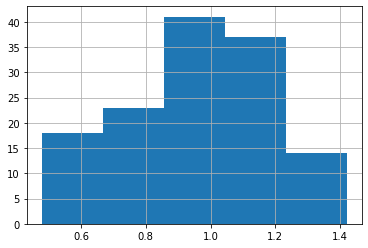

In [25]:
X_train["hue"].hist(bins=5)

In [26]:
avg_alcohol_by_hue = X_train.groupby("hue")["alcohol"].mean()

In [27]:
print(avg_alcohol_by_)

hue
0.48    12.790
0.56    13.230
0.57    13.502
0.58    13.230
0.59    13.270
         ...  
1.31    12.535
1.33    12.160
1.36    12.755
1.38    12.000
1.42    12.290
Name: alcohol, Length: 67, dtype: float64


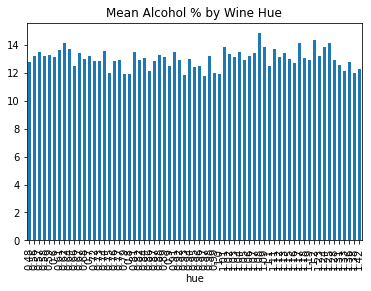

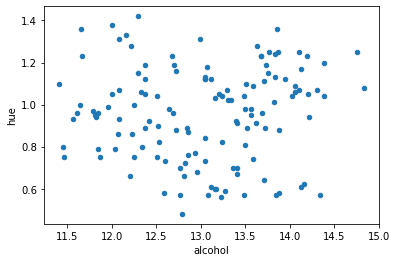

In [29]:
#Scatter plot
X_train.plot(x="alcohol", y="hue", kind="scatter")
plt.show()


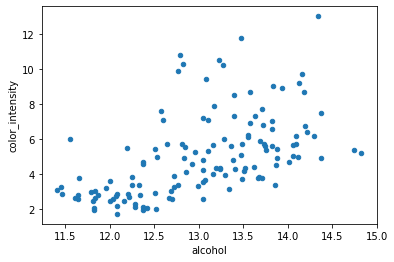

In [30]:
#Scatter plot
X_train.plot(x="alcohol", y="color_intensity", kind="scatter")
plt.show()

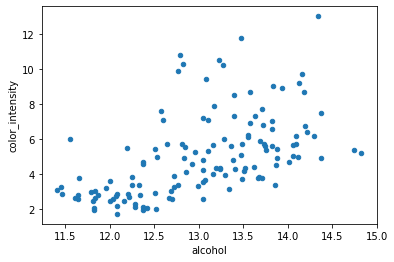

In [31]:
X_train.plot(x="alcohol", y="color_intensity", kind="scatter")
plt.show()

In [32]:
#STEP 6: APPLYING TRANSFORMATIONS TO DATA AND VISUALIZING
print(X_train.var())

alcohol                           0.661669
malic_acid                        1.319446
ash                               0.078467
alcalinity_ash                   12.182149
magnesium                       192.196742
total_phenols                     0.373339
flavanoids                        1.048842
nonflavanoid_phenols              0.014390
proanthocyanins                   0.356379
color_intensity                   5.456455
hue                               0.049317
OD280_OD315_diluted_wines         0.475508
proline                      105507.022101
dtype: float64


In [33]:
# LOGARITHMIC
X_train["proline_log"] = np.log(X_train["proline"])
X_train["magnesium_log"] = np.log(X_train["magnesium"])

In [34]:
print(X_train["proline_log"].var())
print(X_train["magnesium_log"].var())

0.17699642767930357
0.018173064820282143


In [35]:
print(X_train["proline_log"])
print(X_train["magnesium_log"])

34     6.998510
114    5.953243
62     6.445720
139    6.380123
122    5.899897
         ...   
48     6.966024
80     5.627621
145    6.721426
168    6.620073
65     6.519147
Name: proline_log, Length: 133, dtype: float64
34     4.700480
114    4.430817
62     4.543295
139    4.615121
122    4.624973
         ...   
48     4.634729
80     4.454347
145    4.624973
168    4.653960
65     4.584967
Name: magnesium_log, Length: 133, dtype: float64


In [36]:
#Squaring
X_train["proline_square"] = np.square(X_train["proline"])
X_train["magnesium_square"] = np.square(X_train["magnesium"])

print(X_train["proline_square"])
print(X_train["magnesium_square"])

34     1199025
114     148225
62      396900
139     348100
122     133225
        ...   
48     1123600
80       77284
145     688900
168     562500
65      459684
Name: proline_square, Length: 133, dtype: int64
34     12100
114     7056
62      8836
139    10201
122    10404
       ...  
48     10609
80      7396
145    10404
168    11025
65      9604
Name: magnesium_square, Length: 133, dtype: int64


In [37]:
#Cubing
X_train["proline_cubed"] = np.power(X_train["proline"],3)
X_train["magnesium_cubed"] = np.power(X_train["magnesium"],3)

print(X_train["proline_cubed"])
print(X_train["magnesium_cubed"])

34     1312932375
114      57066625
62      250047000
139     205379000
122      48627125
          ...    
48     1191016000
80       21484952
145     571787000
168     421875000
65      311665752
Name: proline_cubed, Length: 133, dtype: int64
34     1331000
114     592704
62      830584
139    1030301
122    1061208
        ...   
48     1092727
80      636056
145    1061208
168    1157625
65      941192
Name: magnesium_cubed, Length: 133, dtype: int64


In [38]:
#Exponentials 
X_train["proline_exp"] = np.exp(X_train["proline"])
X_train["magnesium_exp"] = np.exp(X_train["magnesium"])

print(X_train["proline_exp"])
print(X_train["magnesium_exp"])

34               inf
114    1.597260e+167
62     4.032029e+273
139    1.712949e+256
122    3.292198e+158
           ...      
48               inf
80     5.418336e+120
145              inf
168              inf
65     2.829168e+294
Name: proline_exp, Length: 133, dtype: float64
34     5.920972e+47
114    3.025077e+36
62     6.663176e+40
139    7.307060e+43
122    1.986265e+44
           ...     
48     5.399228e+44
80     2.235247e+37
145    1.986265e+44
168    3.989520e+45
65     3.637971e+42
Name: magnesium_exp, Length: 133, dtype: float64


C:\Users\16469\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

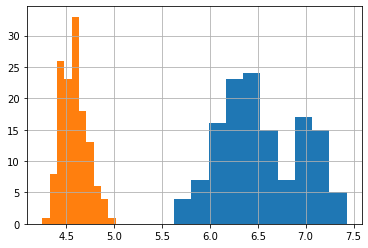

In [39]:
#PLOT THE TRANSFORMED DATA
#HISTOGRAMS
#log
X_train["proline_log"].hist()
X_train["magnesium_log"].hist()

<AxesSubplot:>

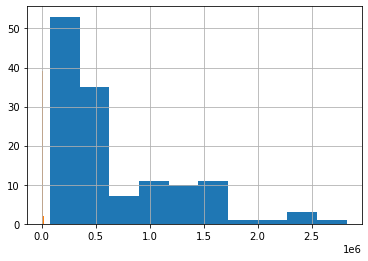

In [40]:
#squared
X_train["proline_square"].hist()
X_train["magnesium_square"].hist()

<AxesSubplot:>

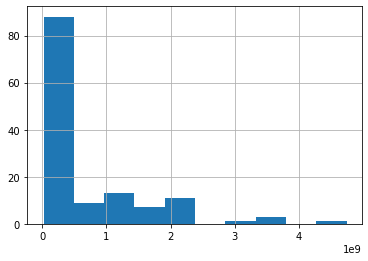

In [41]:
#cubed
X_train["proline_cubed"].hist()
X_train["magnesium_cubed"].hist()

<AxesSubplot:>

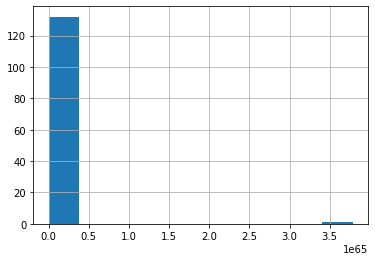

In [42]:
#exponential
X_train["magnesium_exp"].hist()

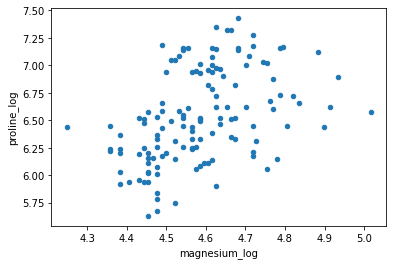

In [43]:
#SCATTERPLOTS
#log
X_train.plot(x="magnesium_log", y="proline_log", kind="scatter")
plt.show()

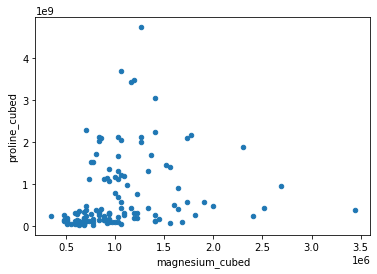

In [44]:
#cubed
X_train.plot(x="magnesium_cubed", y="proline_cubed", kind="scatter")
plt.show()

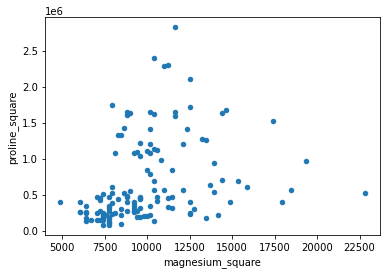

In [45]:
X_train.plot(x="magnesium_square", y="proline_square", kind="scatter")
plt.show()

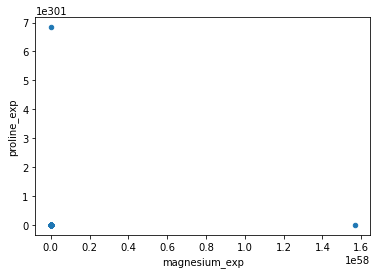

In [46]:
X_train.plot(x="magnesium_exp", y="proline_exp", kind="scatter")
plt.show()